In [6]:
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import numpy as np
from math import cos
from sklearn.gaussian_process.kernels import RBF
from mpl_toolkits.mplot3d import Axes3D
import itertools
import sys
sys.path.insert(0,'../python_scripts/')
from bayesian_optimization import IBO
import time
import seaborn as sns
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%pylab inline
%load_ext autoreload 

Populating the interactive namespace from numpy and matplotlib


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cos']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# This notebook assumes that you have an understanding of how Bayesian Optimization works.
- For a review, please visit the notebook Overview_of_Intelligent_Bayesian_Optimization

## We will compare my implementation of Bayesian Optimization with the bayesian_optimization package
> Bayesian_optimization package: https://github.com/fmfn/BayesianOptimization
- First, compare performance on a one-dimensional function
- Second, compare performance on a two-dimensional function
- Third, compare performance using an objective function to find the best hyperparameters of gradient boosting

### Define the one-dimensional function

In [7]:
oneD_function =lambda x: cos(1000*x-500)+(abs(x*100_000))/(x**4+1000)

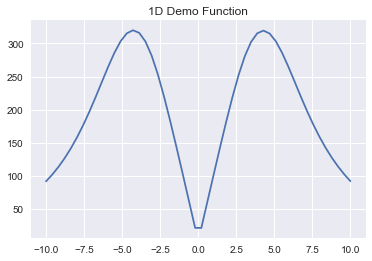

In [8]:
plt.plot(np.linspace(-10,10),[oneD_function(_) for _ in np.linspace(-10,10)])
plt.title('1D Demo Function');

### Setup the package Bayesian_Optimization

In [9]:
bayes_opt = BayesianOptimization(oneD_function,
                          {'x': (-10, 10)}) # the bounds to explore
bayes_opt .explore({'x': np.linspace(-10,10)}) # the points to explore

### Setup my implementation
- Import IBO (Intelligent Bayesian Optimization)

In [10]:
bo_implementation = IBO()

- Define the one train point, as well as the testing domain

In [11]:
test_x_oneD = np.array(np.linspace(-10,10,2_000)).reshape(-1,1)
train_x_oneD = np.array(np.random.choice(test_x_oneD.ravel())).reshape(-1,1)
train_y_numbers_oneD = np.array([oneD_function(_) for _ in train_x_oneD]).reshape(-1,1)

- Fit the gaussian process from IBO

In [12]:
bo_implementation.fit(train_x_oneD,train_y_numbers_oneD, test_x_oneD, oneD_function, y_func_type='real' )

- There are two primary methods in my implementation
        - 1) Predict: predict the next x-coordinates
        - 2) Maximize: try to find the best x-coordinates given the number of steps

# Run one trial of the bayes_opt vs my implementataion
### Compare performance and time

- My implementation

In [328]:
# find the max
start_my_bo = time.time()
bo_implementation.maximize(n_steps=10)
end_my_bo = time.time()

Bayesian Optimization just sampled point = [ 3.1865933]
Best x (Bayesian Optimization) = [ 3.1865933],                         Best y = [ 288.01120847]
Bayesian Optimization just sampled point = [ 3.38669335]
Best x (Bayesian Optimization) = [ 3.38669335], Best y = [ 298.3869829]
Bayesian Optimization just sampled point = [ 3.79689845]
Best x (Bayesian Optimization) = [ 3.79689845], Best y = [ 314.15441828]
Bayesian Optimization just sampled point = [ 3.2066033]
Best x (Bayesian Optimization) = [ 3.79689845], Best y = [ 314.15441828]
Bayesian Optimization just sampled point = [ 3.36668334]
Best x (Bayesian Optimization) = [ 3.79689845], Best y = [ 314.15441828]
Bayesian Optimization just sampled point = [ 4.19709855]
Best x (Bayesian Optimization) = [ 4.19709855], Best y = [ 319.4638755]
Bayesian Optimization just sampled point = [ 5.17758879]
Best x (Bayesian Optimization) = [ 4.19709855], Best y = [ 319.4638755]
Bayesian Optimization just sampled point = [ 4.52726363]
Best x (Bayesia

- Bayes Opt implementation
- Ensure to use the same number of initialization points, same number of steps, same acquisition function (Expected Improvement)

In [333]:
start_bayes_opt = time.time()
bayes_opt .maximize(init_points=1, n_iter=10, acq='ei') # ei = expected improvement
end_bayes_opt = time.time()

Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |   91.60769 |  -10.0000 | 
    2 | 00m00s |  101.84945 |   -9.5918 | 
    3 | 00m00s |  113.47606 |   -9.1837 | 
    4 | 00m00s |  126.66415 |   -8.7755 | 
    5 | 00m00s |  141.57709 |   -8.3673 | 
    6 | 00m00s |  158.33855 |   -7.9592 | 
    7 | 00m00s |  176.99157 |   -7.5510 | 
    8 | 00m00s |  197.43956 |   -7.1429 | 
    9 | 00m00s |  219.36796 |   -6.7347 | 
   10 | 00m00s |  242.15235 |   -6.3265 | 
   11 | 00m00s |  264.77197 |   -5.9184 | 
   12 | 00m00s |  285.76658 |   -5.5102 | 
   13 | 00m00s |  303.29087 |   -5.1020 | 
   14 | 00m00s |  315.31580 |   -4.6939 | 
   15 | 00m00s |  319.97963 |   -4.2857 | 
   16 | 00m00s |  316.00478 |   -3.8776 | 
   17 | 00m00s |  303.02024 |   -3.4694 | 
   18 | 00m00s |  281.63698 |   -3.0612 | 
   19 | 00m00s |  253.23789 |   -2.6531 | 
   20 | 00m00s |  219.58655 |   -2.2449 | 
   21 | 00m00s |  182.42609 |   -1.8367 

/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 1.52453594]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   55 | 00m01s |  320.80285 |   -4.2426 | 
   56 | 00m01s |  321.25755 |   -4.2119 | 
   57 | 00m03s |  319.59456 |   -4.2275 | 
   58 | 00m03s |  321.03280 |   -4.1928 | 


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.14630812]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 59, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


   59 | 00m02s |  320.72717 |   -4.2049 | 


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 5.19919738]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.18158552]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-17427.12230572]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 30, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/jonathanhilgart/a

   60 | 00m03s |  321.43131 |   -4.2376 | 


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.88750339]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-23.89322162]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 55, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   61 | 00m03s |  321.27788 |   -4.2381 | 


#### Compare the results

In [329]:
print(f"The best y-value from my bayesian optimization implementation was {bo_implementation.best_y}.\
      The best x-coordiantes from my bayesian optimiztion implementation was {bo_implementation.best_x}.\
      My implementation took {round(end_my_bo -start_my_bo,2)} seconds for 10 steps")

The best y-value from my bayesian optimization implementation was [ 319.76786769].      The best x-coordiantes from my bayesian optimiztion implementation was [ 4.52726363].      My implementation took 58.25 seconds for 10 steps


In [334]:
print(f" The best values from the Bayes_Opt package was {bayes_opt.res['max']}.\
    The Bayes_Opt implementation took {round(end_bayes_opt -start_bayes_opt,2) } seconds for 10 steps")

 The best values from the Bayes_Opt package was {'max_val': 321.43131427152485, 'max_params': {'x': -4.2375673129286318}}.    The Bayes_Opt implementation took 27.22 seconds for 10 steps


- The Bayes_Opt package beat my implementation in time and speed

## Run each implmentation for 10 trials of 10 steps. See how many times each algo wins.
- One dimensional implementation

In [281]:
# keep track of the wins
my_implementation_wins = 0
bayes_opt_wins = 0

n_trials=10
for i in range(n_trials):
    print('Step Number =',i+1)
    # My implementation
    bo_implementation.fit(train_x_oneD,train_y_numbers_oneD, test_x_oneD, oneD_function, 
                          y_func_type='real', verbose = False )
    bo_implementation.maximize()
    # Bayes Opt Implementation
    bayes_opt = BayesianOptimization(oneD_function,
                          {'x': (-10, 10)}) # the range to explore
    bayes_opt .explore({'x': np.linspace(-10,10)}) # the points to explore
    bayes_opt .maximize(init_points=1, n_iter=10, acq='ei')
    
    if bayes_opt.res['max']['max_val'] > bo_implementation.best_y:
        print("Bayes Opt Won")
        bayes_opt_wins +=1
    else:
        print('My implementation won')
        my_implementation_wins +=1 
    

Step Number = 1
Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |   91.60769 |  -10.0000 | 
    2 | 00m00s |  101.84945 |   -9.5918 | 
    3 | 00m00s |  113.47606 |   -9.1837 | 
    4 | 00m00s |  126.66415 |   -8.7755 | 
    5 | 00m00s |  141.57709 |   -8.3673 | 
    6 | 00m00s |  158.33855 |   -7.9592 | 
    7 | 00m00s |  176.99157 |   -7.5510 | 
    8 | 00m00s |  197.43956 |   -7.1429 | 
    9 | 00m00s |  219.36796 |   -6.7347 | 
   10 | 00m00s |  242.15235 |   -6.3265 | 
   11 | 00m00s |  264.77197 |   -5.9184 | 
   12 | 00m00s |  285.76658 |   -5.5102 | 
   13 | 00m00s |  303.29087 |   -5.1020 | 
   14 | 00m00s |  315.31580 |   -4.6939 | 
   15 | 00m00s |  319.97963 |   -4.2857 | 
   16 | 00m00s |  316.00478 |   -3.8776 | 
   17 | 00m00s |  303.02024 |   -3.4694 | 
   18 | 00m00s |  281.63698 |   -3.0612 | 
   19 | 00m00s |  253.23789 |   -2.6531 | 
   20 | 00m00s |  219.58655 |   -2.2449 | 
   21 | 00m00s |  182.42

/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.04911578]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   53 | 00m01s |  319.15748 |   -4.1531 | 
   54 | 00m01s |  321.32829 |   -4.2371 | 


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2855.25666682]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 34, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/bayes_opt/helpers.py:101: RuntimeWarning: divide by zero encountered in true_divide
  z = (mean - y_max - xi)/std


   55 | 00m01s |  321.32484 |   -4.2433 | 
   56 | 00m01s |  320.21777 |   -4.2393 | 
   57 | 00m01s |  320.92728 |   -4.2052 | 
   58 | 00m02s |  321.40137 |   -4.2249 | 
   59 | 00m02s |  321.29894 |   -4.2506 | 
   60 | 00m02s |  321.04138 |   -4.2321 | 


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.41926343]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


   61 | 00m03s |  319.72784 |   -4.2462 | 
Bayes Opt Won
Step Number = 2
Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |   91.60769 |  -10.0000 | 
    2 | 00m00s |  101.84945 |   -9.5918 | 
    3 | 00m00s |  113.47606 |   -9.1837 | 
    4 | 00m00s |  126.66415 |   -8.7755 | 
    5 | 00m00s |  141.57709 |   -8.3673 | 
    6 | 00m00s |  158.33855 |   -7.9592 | 
    7 | 00m00s |  176.99157 |   -7.5510 | 
    8 | 00m00s |  197.43956 |   -7.1429 | 
    9 | 00m00s |  219.36796 |   -6.7347 | 
   10 | 00m00s |  242.15235 |   -6.3265 | 
   11 | 00m00s |  264.77197 |   -5.9184 | 
   12 | 00m00s |  285.76658 |   -5.5102 | 
   13 | 00m00s |  303.29087 |   -5.1020 | 
   14 | 00m00s |  315.31580 |   -4.6939 | 
   15 | 00m00s |  319.97963 |   -4.2857 | 
   16 | 00m00s |  316.00478 |   -3.8776 | 
   17 | 00m00s |  303.02024 |   -3.4694 | 
   18 | 00m00s |  281.63698 |   -3.0612 | 
   19 | 00m00s |  253.23789 |   -2.6531 | 
   20 | 00

/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.54976831]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   54 | 00m01s |  321.27264 |   -4.2370 | 
   55 | 00m01s |  319.44777 |   -4.2469 | 


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.59775613]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 57, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)


   56 | 00m01s |  320.11636 |   -4.2079 | 
   57 | 00m01s |  319.46820 |   -4.2284 | 
   58 | 00m01s |  321.38464 |   -4.2693 | 
   59 | 00m02s |  321.45535 |   -4.2691 | 
   60 | 00m02s |  320.76590 |   -4.2677 | 
   61 | 00m02s |  320.98690 |   -4.1802 | 
Bayes Opt Won
Step Number = 3
Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |   91.60769 |  -10.0000 | 
    2 | 00m00s |  101.84945 |   -9.5918 | 
    3 | 00m00s |  113.47606 |   -9.1837 | 
    4 | 00m00s |  126.66415 |   -8.7755 | 
    5 | 00m00s |  141.57709 |   -8.3673 | 
    6 | 00m00s |  158.33855 |   -7.9592 | 
    7 | 00m00s |  176.99157 |   -7.5510 | 
    8 | 00m00s |  197.43956 |   -7.1429 | 
    9 | 00m00s |  219.36796 |   -6.7347 | 
   10 | 00m00s |  242.15235 |   -6.3265 | 
   11 | 00m00s |  264.77197 |   -5.9184 | 
   12 | 00m00s |  285.76658 |   -5.5102 | 
   13 | 00m00s |  303.29087 |   -5.1020 | 
   14 | 00m00s |  315.31580 |   -4.6939 | 
   15 | 00

/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.32676724]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   54 | 00m01s |  321.40454 |   -4.2373 | 
   55 | 00m02s |  319.81629 |   -4.2416 | 
   56 | 00m02s |  321.27697 |   -4.2065 | 


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.18812683]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)


   57 | 00m02s |  321.33290 |   -4.2253 | 
   58 | 00m02s |  320.34598 |   -4.2329 | 
   59 | 00m02s |  321.07614 |   -4.2179 | 
   60 | 00m02s |  320.31758 |   -4.2707 | 
   61 | 00m02s |  319.80252 |   -4.1956 | 
Bayes Opt Won
Step Number = 4
Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |   91.60769 |  -10.0000 | 
    2 | 00m00s |  101.84945 |   -9.5918 | 
    3 | 00m00s |  113.47606 |   -9.1837 | 
    4 | 00m00s |  126.66415 |   -8.7755 | 
    5 | 00m00s |  141.57709 |   -8.3673 | 
    6 | 00m00s |  158.33855 |   -7.9592 | 
    7 | 00m00s |  176.99157 |   -7.5510 | 
    8 | 00m00s |  197.43956 |   -7.1429 | 
    9 | 00m00s |  219.36796 |   -6.7347 | 
   10 | 00m00s |  242.15235 |   -6.3265 | 
   11 | 00m00s |  264.77197 |   -5.9184 | 
   12 | 00m00s |  285.76658 |   -5.5102 | 
   13 | 00m00s |  303.29087 |   -5.1020 | 
   14 | 00m00s |  315.31580 |   -4.6939 | 
   15 | 00m00s |  319.97963 |   -4.2857 | 
   16 | 00

/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-3.86554539]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)


   56 | 00m02s |  320.76238 |   -4.2451 | 
   57 | 00m02s |  319.44189 |   -4.2408 | 
   58 | 00m02s |  321.21515 |   -4.2003 | 


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-974.8617298]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 30, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)


   59 | 00m02s |  320.74893 |   -4.2237 | 
   60 | 00m02s |  320.05086 |   -4.1730 | 
   61 | 00m02s |  320.85551 |   -4.2324 | 
Bayes Opt Won
Step Number = 5
Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |   91.60769 |  -10.0000 | 
    2 | 00m00s |  101.84945 |   -9.5918 | 
    3 | 00m00s |  113.47606 |   -9.1837 | 
    4 | 00m00s |  126.66415 |   -8.7755 | 
    5 | 00m00s |  141.57709 |   -8.3673 | 
    6 | 00m00s |  158.33855 |   -7.9592 | 
    7 | 00m00s |  176.99157 |   -7.5510 | 
    8 | 00m00s |  197.43956 |   -7.1429 | 
    9 | 00m00s |  219.36796 |   -6.7347 | 
   10 | 00m00s |  242.15235 |   -6.3265 | 
   11 | 00m00s |  264.77197 |   -5.9184 | 
   12 | 00m00s |  285.76658 |   -5.5102 | 
   13 | 00m00s |  303.29087 |   -5.1020 | 
   14 | 00m00s |  315.31580 |   -4.6939 | 
   15 | 00m00s |  319.97963 |   -4.2857 | 
   16 | 00m00s |  316.00478 |   -3.8776 | 
   17 | 00m00s |  303.02024 |   -3.4694 | 
   18 | 00

/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.07866585]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


   52 | 00m03s |  321.06645 |   -4.2636 | 


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.1511369]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 48, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   53 | 00m01s |  319.08179 |   -4.1527 | 
   54 | 00m01s |  321.42940 |   -4.2374 | 
   55 | 00m02s |  319.45205 |   -4.2408 | 


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.07765566]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 55, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


   56 | 00m02s |  321.19465 |   -4.2055 | 


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 3.36414644]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


   57 | 00m02s |  321.40258 |   -4.2250 | 
   58 | 00m01s |  320.62671 |   -4.2326 | 
   59 | 00m01s |  320.74318 |   -4.2175 | 
   60 | 00m03s |  320.09760 |   -4.2709 | 
   61 | 00m03s |  319.74145 |   -4.1914 | 
Bayes Opt Won
Step Number = 6
Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |   91.60769 |  -10.0000 | 
    2 | 00m00s |  101.84945 |   -9.5918 | 
    3 | 00m00s |  113.47606 |   -9.1837 | 
    4 | 00m00s |  126.66415 |   -8.7755 | 
    5 | 00m00s |  141.57709 |   -8.3673 | 
    6 | 00m00s |  158.33855 |   -7.9592 | 
    7 | 00m00s |  176.99157 |   -7.5510 | 
    8 | 00m00s |  197.43956 |   -7.1429 | 
    9 | 00m00s |  219.36796 |   -6.7347 | 
   10 | 00m00s |  242.15235 |   -6.3265 | 
   11 | 00m00s |  264.77197 |   -5.9184 | 
   12 | 00m00s |  285.76658 |   -5.5102 | 
   13 | 00m00s |  303.29087 |   -5.1020 | 
   14 | 00m00s |  315.31580 |   -4.6939 | 
   15 | 00m00s |  319.97963 |   -4.2857 | 
   16 | 00

/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.03610532]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


   52 | 00m07s |  321.01583 |   -4.2636 | 


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.09802756]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


   53 | 00m03s |  319.40458 |   -4.1535 | 
   54 | 00m02s |  319.99217 |   -4.2355 | 
   55 | 00m03s |  321.30913 |   -4.2621 | 


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.23751804]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)


   56 | 00m05s |  320.12102 |   -4.2545 | 


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.63332582]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 57, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   57 | 00m04s |  320.29345 |   -4.2609 | 
   58 | 00m03s |  321.42902 |   -4.2624 | 
   59 | 00m04s |  320.23879 |   -4.1732 | 
   60 | 00m03s |  321.46115 |   -4.2627 | 


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-12735.2021785]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)


   61 | 00m03s |  319.61093 |   -4.2464 | 
Bayes Opt Won
Step Number = 7
Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |   91.60769 |  -10.0000 | 
    2 | 00m00s |  101.84945 |   -9.5918 | 
    3 | 00m00s |  113.47606 |   -9.1837 | 
    4 | 00m00s |  126.66415 |   -8.7755 | 
    5 | 00m00s |  141.57709 |   -8.3673 | 
    6 | 00m00s |  158.33855 |   -7.9592 | 
    7 | 00m00s |  176.99157 |   -7.5510 | 
    8 | 00m00s |  197.43956 |   -7.1429 | 
    9 | 00m00s |  219.36796 |   -6.7347 | 
   10 | 00m00s |  242.15235 |   -6.3265 | 
   11 | 00m00s |  264.77197 |   -5.9184 | 
   12 | 00m00s |  285.76658 |   -5.5102 | 
   13 | 00m00s |  303.29087 |   -5.1020 | 
   14 | 00m00s |  315.31580 |   -4.6939 | 
   15 | 00m00s |  319.97963 |   -4.2857 | 
   16 | 00m00s |  316.00478 |   -3.8776 | 
   17 | 00m00s |  303.02024 |   -3.4694 | 
   18 | 00m00s |  281.63698 |   -3.0612 | 
   19 | 00m00s |  253.23789 |   -2.6531 | 
   20 | 00

/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.59108616]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   59 | 00m02s |  321.07061 |   -4.1879 | 


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.10487248]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 55, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)


   60 | 00m02s |  321.21175 |   -4.3123 | 


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1590.83918029]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 34, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)


   61 | 00m02s |  319.94978 |   -4.2648 | 
Bayes Opt Won
Step Number = 8
Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |   91.60769 |  -10.0000 | 
    2 | 00m00s |  101.84945 |   -9.5918 | 
    3 | 00m00s |  113.47606 |   -9.1837 | 
    4 | 00m00s |  126.66415 |   -8.7755 | 
    5 | 00m00s |  141.57709 |   -8.3673 | 
    6 | 00m00s |  158.33855 |   -7.9592 | 
    7 | 00m00s |  176.99157 |   -7.5510 | 
    8 | 00m00s |  197.43956 |   -7.1429 | 
    9 | 00m00s |  219.36796 |   -6.7347 | 
   10 | 00m00s |  242.15235 |   -6.3265 | 
   11 | 00m00s |  264.77197 |   -5.9184 | 
   12 | 00m00s |  285.76658 |   -5.5102 | 
   13 | 00m00s |  303.29087 |   -5.1020 | 
   14 | 00m00s |  315.31580 |   -4.6939 | 
   15 | 00m00s |  319.97963 |   -4.2857 | 
   16 | 00m00s |  316.00478 |   -3.8776 | 
   17 | 00m00s |  303.02024 |   -3.4694 | 
   18 | 00m00s |  281.63698 |   -3.0612 | 
   19 | 00m00s |  253.23789 |   -2.6531 | 
   20 | 00

/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.18822115]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   54 | 00m01s |  321.40297 |   -4.2373 | 
   55 | 00m02s |  319.49782 |   -4.2410 | 
   56 | 00m02s |  321.28186 |   -4.2057 | 
   57 | 00m01s |  321.39963 |   -4.2249 | 


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.01026041]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)


   58 | 00m02s |  320.78759 |   -4.2324 | 
   59 | 00m01s |  320.71175 |   -4.2174 | 
   60 | 00m01s |  320.08879 |   -4.1918 | 


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.82733734]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


   61 | 00m01s |  320.18192 |   -4.2708 | 
Bayes Opt Won
Step Number = 9
Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |   91.60769 |  -10.0000 | 
    2 | 00m00s |  101.84945 |   -9.5918 | 
    3 | 00m00s |  113.47606 |   -9.1837 | 
    4 | 00m00s |  126.66415 |   -8.7755 | 
    5 | 00m00s |  141.57709 |   -8.3673 | 
    6 | 00m00s |  158.33855 |   -7.9592 | 
    7 | 00m00s |  176.99157 |   -7.5510 | 
    8 | 00m00s |  197.43956 |   -7.1429 | 
    9 | 00m00s |  219.36796 |   -6.7347 | 
   10 | 00m00s |  242.15235 |   -6.3265 | 
   11 | 00m00s |  264.77197 |   -5.9184 | 
   12 | 00m00s |  285.76658 |   -5.5102 | 
   13 | 00m00s |  303.29087 |   -5.1020 | 
   14 | 00m00s |  315.31580 |   -4.6939 | 
   15 | 00m00s |  319.97963 |   -4.2857 | 
   16 | 00m00s |  316.00478 |   -3.8776 | 
   17 | 00m00s |  303.02024 |   -3.4694 | 
   18 | 00m00s |  281.63698 |   -3.0612 | 
   19 | 00m00s |  253.23789 |   -2.6531 | 
   20 | 00

/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.60229842]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 47, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)


   55 | 00m02s |  320.25669 |   -4.2581 | 
   56 | 00m02s |  321.24676 |   -4.2696 | 
   57 | 00m01s |  320.90001 |   -4.1945 | 
   58 | 00m01s |  319.88297 |   -4.2648 | 
   59 | 00m01s |  321.46508 |   -4.2752 | 
   60 | 00m02s |  319.50270 |   -4.2724 | 
   61 | 00m02s |  320.84812 |   -4.1629 | 
Bayes Opt Won
Step Number = 10
Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |   91.60769 |  -10.0000 | 
    2 | 00m00s |  101.84945 |   -9.5918 | 
    3 | 00m00s |  113.47606 |   -9.1837 | 
    4 | 00m00s |  126.66415 |   -8.7755 | 
    5 | 00m00s |  141.57709 |   -8.3673 | 
    6 | 00m00s |  158.33855 |   -7.9592 | 
    7 | 00m00s |  176.99157 |   -7.5510 | 
    8 | 00m00s |  197.43956 |   -7.1429 | 
    9 | 00m00s |  219.36796 |   -6.7347 | 
   10 | 00m00s |  242.15235 |   -6.3265 | 
   11 | 00m00s |  264.77197 |   -5.9184 | 
   12 | 00m00s |  285.76658 |   -5.5102 | 
   13 | 00m00s |  303.29087 |   -5.1020 | 
   14 | 0

/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.06798105]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 48, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   53 | 00m02s |  320.50233 |   -4.1507 | 
   54 | 00m01s |  321.40445 |   -4.2249 | 
   55 | 00m01s |  321.37099 |   -4.2434 | 


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.3143575]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   56 | 00m01s |  321.07374 |   -4.2241 | 
   57 | 00m01s |  320.09642 |   -4.0622 | 
   58 | 00m01s |  321.18256 |   -4.2319 | 
   59 | 00m02s |  320.48751 |   -4.1173 | 
   60 | 00m01s |  319.71433 |   -4.2273 | 


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.0847015]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)


   61 | 00m02s |  320.97743 |   -4.2365 | 
Bayes Opt Won


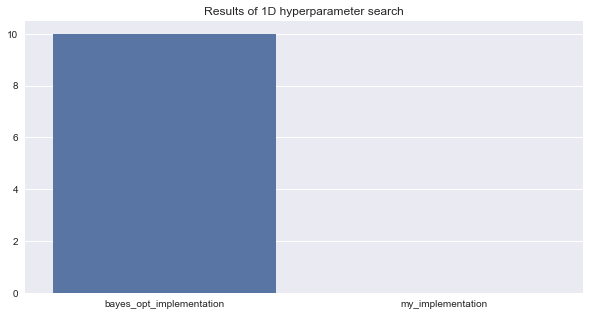

In [286]:
plt.figure(figsize=(10,5))
plt.title('Results of 1D hyperparameter search')
sns.barplot(x = ['bayes_opt_implementation','my_implementation'],y =[bayes_opt_wins, my_implementation_wins] );

- Not a huge suprise that the 'professional' implementation outperforms my implementation

# Next, compare performance over a two-dimensional function

### Eggholder function 

${\displaystyle f(x,y)=-\left(y+47\right)\sin {\sqrt {\left|{\frac {x}{2}}+\left(y+47\right)\right|}}-x\sin {\sqrt {\left|x-\left(y+47\right)\right|}}} $

In [242]:
#twoD_function = lambda x,y: 100*np.sqrt(abs(y-.01*x**2))+.01*abs(x+10)
twoD_function = lambda x,y: -(y+47)*sin(np.sqrt(abs((x/2)+(y+47))))-x*sin(np.sqrt(abs(x-(y+47))))

In [243]:
twoD_domain = np.linspace(-100,100,60)
combo_domain = list(itertools.product(*[twoD_domain,twoD_domain]))
twoD_train_x = np.array([combo_domain[np.random.choice(len(combo_domain))] ] )
twoD_train_y = np.array([twoD_function(twoD_train_x[0][0],twoD_train_x[0][1])]).reshape(-1,1)
# Define the axes for the scatter plot
xs = [combo_domain[i][0] for i in range(len(combo_domain))]
ys = [combo_domain[i][1] for i in range(len(combo_domain))]

In [244]:
print(f"The domain has {len(combo_domain):,} parameters")

The domain has 3,600 parameters


In [245]:
twoD_function_y = np.array([twoD_function(combo_domain[i][0],combo_domain[i][1]) for i in range(len(combo_domain))]).reshape(-1,1)

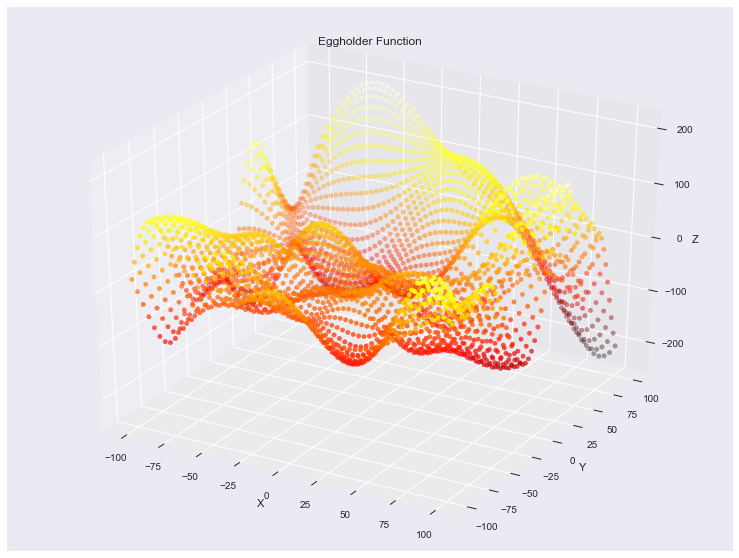

In [29]:
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, twoD_function_y,cmap='hot',c=twoD_function_y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Eggholder Function');

### Setup my implementation

In [249]:
bo_implementation_2d = IBO()

In [250]:
bo_implementation_2d.fit(twoD_train_x, twoD_train_y ,combo_domain, twoD_function , y_func_type='real',
                        kernel_params={'rbf_length':50}) # change the length parameter for the RBF kernel

### Setup the bayesian_optimization implementation

In [251]:
bayes_opt_2d = BayesianOptimization(twoD_function ,
                          {'x': (-100,100),'y':(-100,100)}) # the bounds to explore
bayes_opt_2d .explore({'x': np.linspace(-100,100,60),'y':np.linspace(-100,100,60)}) # the points to explore

## Compare two-dimensional results

In [561]:
my_implementation_2d_s = time.time()
bo_implementation_2d.maximize()
my_implementation_2d_e = time.time()

Bayesian Optimization just sampled point = [ 96.61016949  38.98305085]
Best x (Bayesian Optimization) = [ 96.61016949  38.98305085],                         Best y = [ 82.72288041]
Bayesian Optimization just sampled point = (96.610169491525426, 35.593220338983031)
Best x (Bayesian Optimization) = (96.610169491525426, 35.593220338983031), Best y = 129.2673021437016
Bayesian Optimization just sampled point = (100.0, 35.593220338983031)
Best x (Bayesian Optimization) = (100.0, 35.593220338983031), Best y = 157.46133936416348
Bayesian Optimization just sampled point = (-100.0, 96.610169491525426)
Best x (Bayesian Optimization) = (100.0, 35.593220338983031), Best y = 157.46133936416348
Bayesian Optimization just sampled point = (100.0, 38.983050847457633)
Best x (Bayesian Optimization) = (100.0, 35.593220338983031), Best y = 157.46133936416348
Bayesian Optimization just sampled point = (100.0, 42.372881355932208)
Best x (Bayesian Optimization) = (100.0, 35.593220338983031), Best y = 157.461

In [114]:
bayes_opt_2d_time_s = time.time()
bayes_opt_2d.maximize(init_points=1, n_iter=10, acq='ei')
bayes_opt_2d_time_e = time.time()

Initialization
-----------------------------------------------------
 Step |   Time |      Value |         x |         y | 
    1 | 00m00s |   19.05993 | -100.0000 | -100.0000 | 
    2 | 00m00s |   29.84759 |  -96.6102 |  -96.6102 | 
    3 | 00m00s |   40.85957 |  -93.2203 |  -93.2203 | 
    4 | 00m00s |   51.12372 |  -89.8305 |  -89.8305 | 
    5 | 00m00s |   59.71687 |  -86.4407 |  -86.4407 | 
    6 | 00m00s |   65.84925 |  -83.0508 |  -83.0508 | 
    7 | 00m00s |   68.95078 |  -79.6610 |  -79.6610 | 
    8 | 00m00s |   68.75080 |  -76.2712 |  -76.2712 | 
    9 | 00m00s |   65.34069 |  -72.8814 |  -72.8814 | 
   10 | 00m00s |   59.20652 |  -69.4915 |  -69.4915 | 
   11 | 00m00s |   51.21656 |  -66.1017 |  -66.1017 | 
   12 | 00m00s |   42.54804 |  -62.7119 |  -62.7119 | 
   13 | 00m00s |   34.53798 |  -59.3220 |  -59.3220 | 
   14 | 00m00s |   28.44758 |  -55.9322 |  -55.9322 | 
   15 | 00m00s |   25.14023 |  -52.5424 |  -52.5424 | 
   16 | 00m00s |   24.69531 |  -49.1525 |  -49.1525

KeyboardInterrupt: 

In [566]:
print(f"The best y-value from my bayesian optimization implementation was {bo_implementation_2d.best_y}.\
      The best x-coordiantes from my bayesian optimiztion implementation was {bo_implementation_2d.best_x}.\
      My implementation took {round(my_implementation_2d_e -my_implementation_2d_s,2)} seconds for 10 steps")

The best y-value from my bayesian optimization implementation was 157.92386513208135.      The best x-coordiantes from my bayesian optimiztion implementation was (-32.203389830508485, 96.610169491525426).      My implementation took 124.39 seconds for 10 steps


In [567]:
print(f" The best values from the Bayes_Opt package was {bayes_opt_2d.res['max']}.\
    The Bayes_Opt implementation took {round(bayes_opt_2d_time_e -bayes_opt_2d_time_s,2) } seconds for 10 steps")

 The best values from the Bayes_Opt package was {'max_val': 148.81627716027575, 'max_params': {'x': 63.713397849339685, 'y': 38.959575019263241}}.    The Bayes_Opt implementation took 27.37 seconds for 10 steps


# Run this two dimensional parameter search ten times to compare perforamnce

In [568]:
# keep track of the wins
my_implementation_wins_2d = 0
bayes_opt_wins_2d = 0

n_trials=10
for i in range(n_trials):
    print('Step Number =',i+1)
    # My implementation
    bo_implementation_2d.fit(twoD_train_x, twoD_train_y ,combo_domain, twoD_function , y_func_type='real',
                        kernel_params={'length':50}, verbose=False) # change the length parameter
    bo_implementation_2d.maximize()
    # Bayes Opt Implementation
    bayes_opt_2d = BayesianOptimization(twoD_function ,
                          {'x': (-100,100),'y':(-100,100)}) # the bounds to explore
    bayes_opt_2d .explore({'x': np.linspace(-100,100,60),'y':np.linspace(-100,100,60)}) # the points to explore
    bayes_opt_2d .maximize(init_points=1, n_iter=10, acq='ei')
    
    if bayes_opt_2d.res['max']['max_val'] > bo_implementation_2d.best_y:
        print("Bayes Opt Won")
        bayes_opt_wins_2d +=1
    else:
        print('My implementation won')
        my_implementation_wins_2d +=1 
    

Step Number = 1
Initialization
-----------------------------------------------------
 Step |   Time |      Value |         x |         y | 
    1 | 00m00s |   19.05993 | -100.0000 | -100.0000 | 
    2 | 00m00s |   29.84759 |  -96.6102 |  -96.6102 | 
    3 | 00m00s |   40.85957 |  -93.2203 |  -93.2203 | 
    4 | 00m00s |   51.12372 |  -89.8305 |  -89.8305 | 
    5 | 00m00s |   59.71687 |  -86.4407 |  -86.4407 | 
    6 | 00m00s |   65.84925 |  -83.0508 |  -83.0508 | 
    7 | 00m00s |   68.95078 |  -79.6610 |  -79.6610 | 
    8 | 00m00s |   68.75080 |  -76.2712 |  -76.2712 | 
    9 | 00m00s |   65.34069 |  -72.8814 |  -72.8814 | 
   10 | 00m00s |   59.20652 |  -69.4915 |  -69.4915 | 
   11 | 00m00s |   51.21656 |  -66.1017 |  -66.1017 | 
   12 | 00m00s |   42.54804 |  -62.7119 |  -62.7119 | 
   13 | 00m00s |   34.53798 |  -59.3220 |  -59.3220 | 
   14 | 00m00s |   28.44758 |  -55.9322 |  -55.9322 | 
   15 | 00m00s |   25.14023 |  -52.5424 |  -52.5424 | 
   16 | 00m00s |   24.69531 |  -49.

   61 | 00m00s |   74.78705 |  -41.7351 |  -84.7085 | 
Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |         x |         y | 
   62 | 00m04s |   64.43084 |  -43.3606 |  -84.3532 | 
   63 | 00m02s |   67.27811 |  -37.6954 |  -85.5583 | 
   64 | 00m02s |   78.01578 |  -41.1436 |  -85.1314 | 
   65 | 00m02s |   76.97042 |  -40.2333 |  -85.3495 | 
   66 | 00m02s |   79.13340 |  -41.1325 |  -86.3318 | 
   67 | 00m02s |   79.05016 |  -41.0356 |  -86.1555 | 


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.02362338]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)


   68 | 00m02s |   74.07022 |  -40.8681 |  -86.8713 | 
   69 | 00m02s |   80.35481 |  -41.8592 |  -86.0161 | 
   70 | 00m03s |   80.23710 |  -41.4286 |  -86.3201 | 
   71 | 00m02s |   80.31516 |  -41.5665 |  -86.0361 | 
My implementation won
Step Number = 3
Initialization
-----------------------------------------------------
 Step |   Time |      Value |         x |         y | 
    1 | 00m00s |   19.05993 | -100.0000 | -100.0000 | 
    2 | 00m00s |   29.84759 |  -96.6102 |  -96.6102 | 
    3 | 00m00s |   40.85957 |  -93.2203 |  -93.2203 | 
    4 | 00m00s |   51.12372 |  -89.8305 |  -89.8305 | 
    5 | 00m00s |   59.71687 |  -86.4407 |  -86.4407 | 
    6 | 00m00s |   65.84925 |  -83.0508 |  -83.0508 | 
    7 | 00m00s |   68.95078 |  -79.6610 |  -79.6610 | 
    8 | 00m00s |   68.75080 |  -76.2712 |  -76.2712 | 
    9 | 00m00s |   65.34069 |  -72.8814 |  -72.8814 | 
   10 | 00m00s |   59.20652 |  -69.4915 |  -69.4915 | 
   11 | 00m00s |   51.21656 |  -66.1017 |  -66.1017 | 
   12 | 00m00

   61 | 00m00s |   27.45943 |   96.6154 |  -45.0263 | 
Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |         x |         y | 
   62 | 00m03s |   70.70315 |   50.3847 |   50.0159 | 
   63 | 00m01s |   74.22989 |   51.6240 |   49.9342 | 
   64 | 00m01s |   90.53931 |   53.9798 |   47.3457 | 
   65 | 00m01s |  108.96200 |   56.1542 |   44.8050 | 
   66 | 00m01s |  121.81027 |   57.6077 |   42.9684 | 
   67 | 00m02s |  136.20696 |   59.6910 |   40.9507 | 
   68 | 00m02s |  142.57638 |   60.9531 |   39.2971 | 
   69 | 00m02s |  144.42549 |   61.6845 |   38.4654 | 
   70 | 00m02s |  145.39426 |   62.2198 |   38.2539 | 
   71 | 00m02s |  146.74908 |   63.1020 |   38.1953 | 
My implementation won
Step Number = 5
Initialization
-----------------------------------------------------
 Step |   Time |      Value |         x |         y | 
    1 | 00m00s |   19.05993 | -100.0000 | -100.0000 | 
    2 | 00m00s |   29.84759 |  -96.6102 |  -96.

   57 | 00m00s | -157.10384 |   89.8305 |   89.8305 | 
   58 | 00m00s | -175.60494 |   93.2203 |   93.2203 | 
   59 | 00m00s | -190.19940 |   96.6102 |   96.6102 | 
   60 | 00m00s | -200.41439 |  100.0000 |  100.0000 | 
   61 | 00m00s |   55.09915 |   93.2657 |  -55.0229 | 
Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |         x |         y | 
   62 | 00m03s |   70.48977 |   50.6522 |   50.3715 | 
   63 | 00m01s |   71.16070 |   50.7790 |   50.2314 | 
   64 | 00m01s |   88.66118 |   53.3860 |   47.1754 | 
   65 | 00m02s |  104.75796 |   55.2477 |   44.7439 | 
   66 | 00m01s |  119.46878 |   56.9848 |   42.6926 | 
   67 | 00m02s |  128.80260 |   58.1088 |   41.0790 | 
   68 | 00m02s |  137.50178 |   59.5269 |   39.2478 | 
   69 | 00m02s |  142.17007 |   60.8914 |   38.1938 | 
   70 | 00m02s |  142.44678 |   62.0377 |   36.7778 | 
   71 | 00m02s |  142.93293 |   61.4938 |   37.5015 | 
My implementation won
Step Number = 7
Initia

Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |         x |         y | 
   62 | 00m03s |   68.57192 |   49.8393 |   50.3748 | 
   63 | 00m01s |   76.17230 |   50.6530 |   48.0772 | 
   64 | 00m01s |   90.55592 |   53.5033 |   46.7261 | 
   65 | 00m01s |  108.40421 |   55.7408 |   44.3471 | 
   66 | 00m01s |  122.86048 |   57.6815 |   42.7195 | 
   67 | 00m01s |  134.85190 |   59.3879 |   40.9731 | 
   68 | 00m01s |  142.38263 |   60.9384 |   39.7306 | 
   69 | 00m02s |  147.20352 |   62.7578 |   38.9300 | 
   70 | 00m02s |  147.33109 |   63.3906 |   38.3196 | 
   71 | 00m02s |  147.54948 |   63.0162 |   38.8088 | 
My implementation won
Step Number = 9
Initialization
-----------------------------------------------------
 Step |   Time |      Value |         x |         y | 
    1 | 00m00s |   19.05993 | -100.0000 | -100.0000 | 
    2 | 00m00s |   29.84759 |  -96.6102 |  -96.6102 | 
    3 | 00m00s |   40.85957 |  -93.2203 |  -93.

Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |         x |         y | 
   62 | 00m03s |   83.44843 |   -4.4339 |   97.7561 | 
   63 | 00m01s |   91.69800 |   -2.9293 |   94.8833 | 
   64 | 00m01s |   95.79134 |   -1.6773 |   93.1714 | 
   65 | 00m02s |   98.04735 |   -0.7912 |   92.1410 | 
   66 | 00m01s |   99.22217 |    0.3973 |   91.3205 | 
   67 | 00m02s |  100.61204 |    0.2633 |   90.9576 | 
   68 | 00m02s |  109.71727 |   -1.4283 |   88.4739 | 
   69 | 00m02s |  114.40207 |   -2.5037 |   86.7679 | 
   70 | 00m02s |  116.42747 |   -3.3352 |   85.9322 | 
   71 | 00m02s |  117.74554 |   -3.8650 |   85.2343 | 
My implementation won


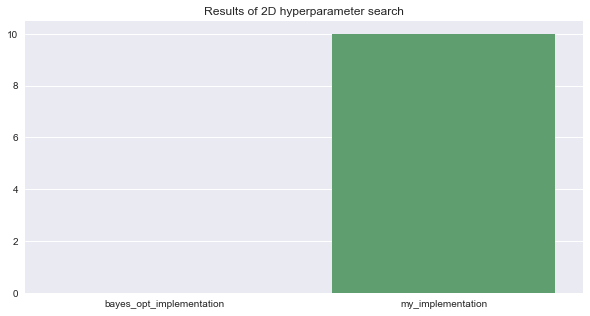

In [570]:
plt.figure(figsize=(10,5))
plt.title('Results of 2D hyperparameter search')
sns.barplot(x = ['bayes_opt_implementation','my_implementation'],y =[bayes_opt_wins_2d, my_implementation_wins_2d] );

- I manually tuned the length parameter of the RBF kernel which explains the better performance 

# Finally, test IBO vs bayesian_optimization using an objective function
- Maximize the negative root mean squarred error
- Use a the Cycle Power Plant data set https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant
>The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.
We provide the data both in .ods and in .xlsx formats.
- Predict  the net hourly electrical energy output (EP) 
- Domain: N_estimators [1,700,5] Max_depth [1,50]


### Open up the data

In [16]:
power_cycle_df  = pd.read_excel("../data/power_cycle.xlsx")

In [17]:
power_cycle_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [18]:
power_cycle_df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [19]:
X_train, X_test, y_train, y_test = train_test_split(power_cycle_df.iloc[:,:-1] , power_cycle_df.iloc[:,-1]
                                                    ,test_size = .1, random_state = 20)

### Need to define the objective function to visualize the loss manifold

In [20]:
def hyperparam_choice_function(hyperparameter_value, X_train_in=X_train, 
                               X_test_in = X_test, y_train_in = y_train, y_test_in = y_test,
                               model = GradientBoostingRegressor, dimensions = 'one', hyperparameter_value_two = None):
    """Returns the negative MSE of the input hyperparameter for the given  hyperparameter.
    Used with GGradient Boosting
    Relies on a global name scope to bring in the data.
    If dimensions = one, then search n_estimators. if dimension equal two then search over n_estimators and max_depth"""
    if dimensions == 'one':
        try:
            m = model(n_estimators= int(hyperparameter_value))
        except:
             m = model(n_estimators= hyperparameter_value)
        m.fit(X_train_in, y_train_in)
        pred = m.predict(X_test_in)
        n_mse = root_mean_squared_error(y_test_in, pred)
        return n_mse
    elif dimensions =='two':
        try:
            m = model(n_estimators = int(hyperparameter_value), max_depth = int(hyperparameter_value_two))
        except:
            m = model(n_estimators = hyperparameter_value, max_depth = hyperparameter_value_two)
        m.fit(X_train_in, y_train_in)
        pred = m.predict(X_test_in)
        n_mse = root_mean_squared_error(y_test_in, pred)
        return n_mse
    else:
        return ' We do not support this number of dimensions yet'
# MSE
def root_mean_squared_error(actual, predicted, negative = True):
    """RMSE of actual and predicted value.
    Negative turn the MSE negative to allow for maximization instead of minimization"""
    if negative == True:
        return - np.sqrt(sum((actual.reshape(-1,1) - predicted.reshape(-1,1)**2))
                                 /len(actual))
    else:
        return np.sqrt(sum((actual.reshape(-1,1) - predicted.reshape(-1,1)**2))
                                 /len(actual))

In [21]:
def hyperparam_choice_function_two(hyperparameter_value,hyperparameter_value_two, X_train_in=X_train, 
                               X_test_in = X_test, y_train_in = y_train, y_test_in = y_test,
                               model = GradientBoostingRegressor):
    """For two dimensions choice function"""

    m = model(n_estimators = int(hyperparameter_value), max_depth = int(hyperparameter_value_two))
    m.fit(X_train_in, y_train_in)
    pred = m.predict(X_test_in)
    n_mse = mean_squared_error(y_test_in, pred, negative= True)
    return n_mse
    

In [50]:
def hyp_choice_sklearn(hyperparameter_value,hyperparameter_value_two, y_tra = y_train, X_tra = X_train,
                       X_tes = X_test, y_tes = y_test):
    hyperparameter_value = int(hyperparameter_value)
    hyperparameter_value_two = int(hyperparameter_value_two)
    nmse = - mean_squared_error(y_tes,
                                GradientBoostingRegressor(n_estimators=hyperparameter_value,
                                max_depth =hyperparameter_value_two).fit(X_tra.as_matrix()
                                                                         ,y_tra.as_matrix()).predict(
                                    X_tes.as_matrix()))
    return nmse

In [37]:
hyp_choice_sklearn(500,3)

-11.374064025674747

### Visualize the loss manifold

In [23]:
domain_n_estimators = range(1,700,5)
domain_max_depth = range(1,50)

combo_domain_hyp = np.array(list(itertools.product(*[domain_n_estimators, domain_max_depth ])))
twoD_train_x_hyp = np.array([combo_domain_hyp[np.random.choice(len(combo_domain_hyp))] ] )
twoD_train_y_hyp = np.array([hyperparam_choice_function(twoD_train_x_hyp[0][0], dimensions = 'two',
                                                        hyperparameter_value_two = twoD_train_x_hyp[0][1])]).reshape(-1,1)
# Define the axes for the scatter plot
xs = [combo_domain_hyp[i][0] for i in range(len(combo_domain_hyp))]
ys = [combo_domain_hyp[i][1] for i in range(len(combo_domain_hyp))]

/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt


In [260]:
combo_domain_hyp[0]

array([1, 1])

In [158]:
zs = np.array([hyperparam_choice_function(combo_domain_hyp[i][0],dimensions='two',
                        hyperparameter_value_two = combo_domain_hyp[i][1]) for i in range(len(combo_domain_hyp))]).reshape(-1,1)

KeyboardInterrupt: 

In [ ]:
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, twoD_function_y,cmap='hot',c=twoD_function_y)
ax.set_xlabel('n_estimators')
ax.set_ylabel('max_depth')
ax.set_zlabel('negativeRMSE')
ax.set_title('Gradient Boosting');

### Fit my implementation

In [51]:
bo_hyperparams = IBO()

In [52]:
bo_hyperparams.fit(twoD_train_x_hyp , twoD_train_y_hyp, combo_domain_hyp ,None, y_func_type='objective' ,
                   test_points_x = X_test, 
                  test_points_y = y_test, model_obj= GradientBoostingRegressor,
                  model_train_points_x =X_train, model_train_points_y =  y_train)

### Fit the bayesian_optimization package

In [56]:
bayes_opt_hyp = BayesianOptimization(hyp_choice_sklearn,
                          {'hyperparameter_value': (1, 700),'hyperparameter_value_two':(1,71) }) # the bounds to explore
bayes_opt_hyp .explore({'hyperparameter_value': [int(i) for i in range(1,700,10)],
                        'hyperparameter_value_two':[int(i) for i in range(1,71)]}) # the points to explore, need the same size

## Maximize my function

In [138]:
bo_hyperparams.maximize()

Bayesian Optimization just sampled point = [356  25]
Best x (Bayesian Optimization) = [356  25],                         Best y = [-4.48355675]
Bayesian Optimization just sampled point = (301, 11)
Best x (Bayesian Optimization) = [356  25], Best y = [-4.48355675]
Bayesian Optimization just sampled point = (626, 35)
Best x (Bayesian Optimization) = [356  25], Best y = [-4.48355675]
Bayesian Optimization just sampled point = (126, 45)
Best x (Bayesian Optimization) = [356  25], Best y = [-4.48355675]
Bayesian Optimization just sampled point = (166, 9)
Best x (Bayesian Optimization) = [356  25], Best y = [-4.48355675]
Bayesian Optimization just sampled point = (291, 30)
Best x (Bayesian Optimization) = (291, 30), Best y = -4.453798041945481
Bayesian Optimization just sampled point = (296, 4)
Best x (Bayesian Optimization) = (291, 30), Best y = -4.453798041945481
Bayesian Optimization just sampled point = (351, 15)
Best x (Bayesian Optimization) = (291, 30), Best y = -4.453798041945481
Bay

((291, 30), -4.4537980419454808)

## Maximize the BayesianOptimization package

In [57]:
bayes_opt_hyp.maximize(init_points=1, n_iter=10, acq='ei') # ten steps

Initialization
-----------------------------------------------------------------------------------
 Step |   Time |      Value |   hyperparameter_value |   hyperparameter_value_two | 
    1 | 00m00s | -261.58979 |                 1.0000 |                     1.0000 | 
    2 | 00m00s |  -56.24921 |                11.0000 |                     2.0000 | 
    3 | 00m00s |  -22.67266 |                21.0000 |                     3.0000 | 
    4 | 00m00s |  -16.45172 |                31.0000 |                     4.0000 | 
    5 | 00m00s |  -13.92228 |                41.0000 |                     5.0000 | 
    6 | 00m00s |  -12.38456 |                51.0000 |                     6.0000 | 
    7 | 00m00s |  -11.49106 |                61.0000 |                     7.0000 | 
    8 | 00m01s |  -10.33892 |                71.0000 |                     8.0000 | 
    9 | 00m01s |  -10.34315 |                81.0000 |                     9.0000 | 
   10 | 00m02s |  -10.09161 |                91.000